In [2]:
## pycistarget terminal version

import warnings
warnings.simplefilter(action = 'ignore')
import pycisTopic
pycisTopic.__version__
import numpy as np
import pandas as pd

projDir = '/media/ggj/FYT/CH/CH-cross/Fig3/Scenicplus/mm9/'
outDir = projDir + 'output/'
import os
if not os.path.exists(outDir):
    os.makedirs(outDir)
tmpDir = '/media/ggj/FYT/CH/tmp/'
if not os.path.exists(tmpDir):
    os.makedirs(tmpDir)

In [3]:
## ray init
import ray
ray.init('auto')
#ray.init(address='10.105.100.3:6379')
#assert ray.is_initialized() ==True

2023-04-16 22:25:42,870	INFO worker.py:1364 -- Connecting to existing Ray cluster at address: 210.32.148.185:6379...
2023-04-16 22:25:42,882	INFO worker.py:1544 -- Connected to Ray cluster. View the dashboard at http://127.0.0.1:8265 


Python version:,3.8.13
Ray version:,2.3.0
Dashboard:,http://127.0.0.1:8265


In [8]:
#
from scenicplus.scenicplus_class import SCENICPLUS, create_SCENICPLUS_object
from scenicplus.preprocessing.filtering import *

# load data
import pickle
infile = open('/media/ggj/FYT/CH/CH-cross/Fig3/Scenicplus/mm9/output/mm9_cluster_cistopicObject.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()

import pickle
infile = open('/media/ggj/FYT/CH/CH-cross/Fig3/Scenicplus/mm9/output/DARs/Imputed_accessibility.pkl', 'rb')
imputed_acc_obj = pickle.load(infile)
infile.close()

infile = open('/media/ggj/FYT/CH/CH-cross/Fig3/Scenicplus/mm9/output/pycisTarget/menr.pkl', 'rb') # change here

menr = pickle.load(infile)
infile.close()

In [9]:
## RNA 
from loomxpy.loomxpy import SCopeLoom
from pycisTopic.loom import *
import itertools
import anndata
import scanpy as sc
import numpy as np
rna_anndata = sc.read_loom('/media/ggj/FYT/CH/CH-cross/Fig3/Scenicplus/mm9/mm9_rna_lineage_pseudo_20_0416.loom')
rna_anndata


## Create Scenicplus object.
scplus_obj = create_SCENICPLUS_object(GEX_anndata = rna_anndata, 
                                     cisTopic_obj = cistopic_obj,
                                     imputed_acc_obj = imputed_acc_obj,
                                     menr = menr,
                                     multi_ome_mode = False,
                                     key_to_group_by = 'lineage',
                                     nr_cells_per_metacells = 5)

2023-04-16 22:33:29,601 create scenicplus object INFO     Following annotations were found in both assays under key lineage:
	Gut, Renal, Endothelial, Muscle, Stromal, Immune, Neural, Hepatocyte, Epithelial.
Keeping 2278 cells for RNA and 18569 for ATAC.
2023-04-16 22:39:07,304 create scenicplus object INFO     Automatically set `nr_metacells` to: Endothelial: 40, Epithelial: 164, Gut: 16, Hepatocyte: 10, Immune: 482, Muscle: 26, Neural: 88, Renal: 26, Stromal: 56
2023-04-16 22:39:07,307 create scenicplus object INFO     Generating pseudo multi-ome data


In [10]:
saveDir = outDir + 'scenicplus/'
if not os.path.exists(saveDir):
    os.mkdir(saveDir)

In [11]:
import scenicplus

In [12]:
from scenicplus import *

In [13]:
from scenicplus.wrappers.run_scenicplus import run_scenicplus

In [14]:
annot_use=pd.read_csv('./mm9_geneanno.csv', sep=',', header=0)
annot_use

,Chromosome,Start,End,Strand,Gene,Transcription_Start_Site,Transcript_type
0,chr1,3195985,3661579,-,Xkr4,3195985,protein_coding
1,chr1,4280927,4399322,-,Rp1,4280927,protein_coding
2,chr1,4481009,4486494,-,Sox17,4481009,protein_coding
3,chr1,4763279,4775807,-,Mrpl15,4763279,protein_coding
4,chr1,4797974,4836816,+,Lypla1,4797974,protein_coding
...,...,...,...,...,...,...,...
21650,chrY,597158,623056,-,Ddx3y,597158,protein_coding
21651,chrY,635404,796225,-,Usp9y,635404,protein_coding
21652,chrY,1362123,1426357,-,Zfy2,1362123,protein_coding
21653,chrY,1918381,1919568,-,Sry,1918381,protein_coding


In [15]:
import pyranges as pr
annot_use= pr.PyRanges(annot_use)

In [16]:
annot_use

,Chromosome,Start,End,Strand,Gene,Transcription_Start_Site,Transcript_type
0,chr1,4797974,4836816,+,Lypla1,4797974,protein_coding
1,chr1,4847775,4887990,+,Tcea1,4847775,protein_coding
2,chr1,5073254,5152630,+,Atp6v1h,5073254,protein_coding
3,chr1,5578574,5592947,+,Oprk1,5578574,protein_coding
4,chr1,6204743,6266185,+,Rb1cc1,6204743,protein_coding
...,...,...,...,...,...,...,...
21650,chrY,433587,582199,-,Uty,433587,protein_coding
21651,chrY,597158,623056,-,Ddx3y,597158,protein_coding
21652,chrY,635404,796225,-,Usp9y,635404,protein_coding
21653,chrY,1362123,1426357,-,Zfy2,1362123,protein_coding


In [17]:
ucsc_assembly='mm9'
import requests
target_url = 'http://hgdownload.cse.ucsc.edu/goldenPath/{asm}/bigZips/{asm}.chrom.sizes'.format(
            asm=ucsc_assembly)
        # check wether url exists
request = requests.get(target_url)
if request.status_code == 200:
    #log.info("Downloading chromosome sizes from: {}".format(target_url))
    chromsizes = pd.read_csv(target_url, sep='\t', header=None)
    chromsizes.columns = ['Chromosome', 'End']
    chromsizes['Start'] = [0]*chromsizes.shape[0]
    chromsizes = chromsizes.loc[:, ['Chromosome', 'Start', 'End']]
if not any(['chr' in c for c in scplus_obj.region_names]):
    annot.Chromosome = annot.Chromosome.str.replace('chr', '')
    chromsizes = pr.PyRanges(chromsizes)

In [18]:
chromsizes

,Chromosome,Start,End
0,chr1,0,197195432
1,chr2,0,181748087
2,chr3,0,159599783
3,chr4,0,155630120
4,chr5,0,152537259
5,chr6,0,149517037
6,chr7,0,152524553
7,chr8,0,131738871
8,chr9,0,124076172
9,chr10,0,129993255


In [19]:
try:
    sys.stderr = open(os.devnull, "w")  # silence stderr
    run_scenicplus(
        scplus_obj = scplus_obj,
        variable = ['lineage'],
        species = 'mmusculus',
        ensembl_assembly=None,ucsc_assembly=None,
        pr_annot=annot_use,pr_chromsizes=chromsizes,
        tf_file = '/media/ggj/Guo-4T-AI/Scenicplus_database/allTFs_mm.txt',
        save_path = saveDir,
        biomart_host = 'http://www.ensembl.org/',
        upstream = [1000, 150000],
        downstream = [1000, 150000],
        calculate_TF_eGRN_correlation = False,
        calculate_DEGs_DARs = True,
        export_to_loom_file = False,
        export_to_UCSC_file = False,
        n_cpu = 10,ignore_reinit_error=True,
        _temp_dir = os.path.join(tmpDir, 'ray_spill'))
    sys.stderr = sys.__stderr__  # unsilence stderr
except Exception as e:
    #in case of failure, still save the object
    with open(saveDir + 'scplus_obj', 'wb') as f:
        pickle.dump(scplus_obj, f)
    raise(e)

2023-04-16 22:41:36,231 SCENIC+_wrapper INFO     /media/ggj/FYT/CH/CH-cross/Fig3/Scenicplus/mm9/output/scenicplus/ folder already exists.
2023-04-16 22:41:36,232 SCENIC+_wrapper INFO     Merging cistromes
2023-04-16 22:41:51,871 SCENIC+_wrapper INFO     Getting search space
2023-04-16 22:41:53,067 R2G          INFO     Extending promoter annotation to 10 bp upstream and 10 downstream
2023-04-16 22:41:53,272 R2G          INFO     Extending search space to:
            						150000 bp downstream of the end of the gene.
            						150000 bp upstream of the start of the gene.
2023-04-16 22:41:54,226 R2G          INFO     Intersecting with regions.
2023-04-16 22:41:55,273 R2G          INFO     Calculating distances from region to gene
2023-04-16 22:44:14,050 R2G          INFO     Imploding multiple entries per region and gene
2023-04-16 22:49:11,381 R2G          INFO     Done!
2023-04-16 22:49:11,991 SCENIC+_wrapper INFO     Inferring region to gene relationships
2023-04-16 22:49:12,

2023-04-16 22:57:02,377	INFO worker.py:1382 -- Calling ray.init() again after it has already been called.


2023-04-16 22:59:07,694 GSEA         INFO     Subsetting TF2G adjacencies for TF with motif.


2023-04-16 22:59:13,131	INFO worker.py:1544 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8266 


2023-04-16 22:59:13,962 GSEA         INFO     Running GSEA...
2023-04-16 23:01:00,178 GSEA         INFO     Subsetting on adjusted pvalue: 1, minimal NES: 0 and minimal leading edge genes 10
2023-04-16 23:01:00,591 GSEA         INFO     Merging eRegulons
2023-04-16 23:01:00,715 GSEA         INFO     Storing eRegulons in .uns[eRegulons].
2023-04-16 23:01:01,658 SCENIC+_wrapper INFO     Formatting eGRNs
2023-04-16 23:01:48,754 SCENIC+_wrapper INFO     Converting eGRNs to signatures
2023-04-16 23:01:50,566 SCENIC+_wrapper INFO     Calculating eGRNs AUC
2023-04-16 23:01:50,572 SCENIC+_wrapper INFO     Calculating region ranking
2023-04-16 23:03:09,607 SCENIC+_wrapper INFO     Calculating eGRNs region based AUC
2023-04-16 23:03:21,123 SCENIC+_wrapper INFO     Calculating gene ranking
2023-04-16 23:03:21,472 SCENIC+_wrapper INFO     Calculating eGRNs gene based AUC
2023-04-16 23:03:27,184 SCENIC+_wrapper INFO     Binarizing eGRNs AUC
2023-04-16 23:06:24,844 SCENIC+_wrapper INFO     Making eG

... storing 'lineage' as categorical


2023-04-16 23:06:41,059 SCENIC+      INFO     Finished calculating DEGs for variable lineage
2023-04-16 23:06:41,060 SCENIC+      INFO     Calculating DARs for variable lineage
2023-04-16 23:06:55,031 SCENIC+      INFO     There are 84983 variable features


... storing 'lineage' as categorical


2023-04-16 23:07:07,986 SCENIC+      INFO     Finished calculating DARs for variable lineage
2023-04-16 23:07:07,990 SCENIC+_wrapper INFO     Saving object
2023-04-16 23:16:26,419 SCENIC+_wrapper INFO     Finished! Took 34.836485926310225 minutes


# Downstream analysis

In [1]:
## pycistarget terminal version

import warnings
warnings.simplefilter(action = 'ignore')
import pycisTopic
pycisTopic.__version__
import numpy as np
import pandas as pd

projDir = '/media/ggj/FYT/CH/CH-cross/Fig3/Scenicplus/mm9/'
outDir = projDir + 'output/'
import os
if not os.path.exists(outDir):
    os.makedirs(outDir)
tmpDir = '/media/ggj/FYT/CH/tmp/'
if not os.path.exists(tmpDir):
    os.makedirs(tmpDir)

In [2]:
## ray init
import ray
ray.init('auto')
#ray.init(address='10.105.100.3:6379')
#assert ray.is_initialized() ==True

2023-04-12 03:18:31,477	INFO worker.py:1364 -- Connecting to existing Ray cluster at address: 210.32.153.239:6379...
2023-04-12 03:18:31,541	INFO worker.py:1544 -- Connected to Ray cluster. View the dashboard at http://127.0.0.1:8265 


Python version:,3.8.13
Ray version:,2.3.0
Dashboard:,http://127.0.0.1:8265


In [3]:
saveDir = outDir + 'scenicplus/'
if not os.path.exists(saveDir):
    os.mkdir(saveDir)

In [4]:
# Downstream analysis
import pickle
infile = open(saveDir + 'scplus_obj.pkl', 'rb')
scplus_obj = pickle.load(infile)
infile.close()

In [20]:
from scenicplus.preprocessing.filtering import apply_std_filtering_to_eRegulons
apply_std_filtering_to_eRegulons(scplus_obj)
scplus_obj.uns['eRegulon_metadata_filtered'].head()

Only keeping positive R2G
Only keep extended if not direct
Getting signatures...
Simplifying eRegulons ...


,Region_signature_name,Gene_signature_name,TF,is_extended,Region,Gene,R2G_importance,R2G_rho,R2G_importance_x_rho,R2G_importance_x_abs_rho,TF2G_importance,TF2G_regulation,TF2G_rho,TF2G_importance_x_abs_rho,TF2G_importance_x_rho,Consensus_name
0,Arid5b_+_(15r),Arid5b_+_(12g),Arid5b,False,chr4:97276948-97277448,Nfia,0.024292,0.466115,0.011323,0.011323,0.561465,1,0.319327,0.179291,0.179291,Arid5b_+_+
1,Arid5b_+_(15r),Arid5b_+_(12g),Arid5b,False,chr4:97278217-97278717,Nfia,0.041737,0.491824,0.020527,0.020527,0.561465,1,0.319327,0.179291,0.179291,Arid5b_+_+
2,Arid5b_+_(15r),Arid5b_+_(12g),Arid5b,False,chr5:120120660-120121160,Tbx3,0.061493,0.610919,0.037567,0.037567,0.825321,1,0.199525,0.164673,0.164673,Arid5b_+_+
3,Arid5b_+_(15r),Arid5b_+_(12g),Arid5b,False,chr5:120025151-120025651,Tbx3,0.038543,0.418675,0.016137,0.016137,0.825321,1,0.199525,0.164673,0.164673,Arid5b_+_+
4,Arid5b_+_(15r),Arid5b_+_(12g),Arid5b,False,chr13:48789339-48789839,Barx1,0.044698,0.349591,0.015626,0.015626,1.726646,1,0.267885,0.462542,0.462542,Arid5b_+_+


In [6]:
scplus_obj.uns['eRegulon_metadata_filtered'].to_csv(saveDir + 'eRegulon_metadata_filtered.csv')
scplus_obj.uns['eRegulon_metadata'].to_csv(saveDir + 'eRegulon_metadata.csv')

In [21]:
import dill
from scenicplus.eregulon_enrichment import score_eRegulons
region_ranking = dill.load(open(os.path.join(saveDir,  'region_ranking.pkl'), 'rb')) #load ranking calculated using the wrapper function
gene_ranking = dill.load(open(os.path.join(saveDir, 'gene_ranking.pkl'), 'rb')) #load ranking calculated using the wrapper function

In [22]:
#auc
score_eRegulons(scplus_obj,
                ranking = region_ranking,
                eRegulon_signatures_key = 'eRegulon_signatures_filtered',
                key_added = 'eRegulon_AUC_filtered',
                enrichment_type= 'region',
                auc_threshold = 0.1,
                normalize = False,
                n_cpu = 5)
score_eRegulons(scplus_obj,
                gene_ranking,
                eRegulon_signatures_key = 'eRegulon_signatures_filtered',
                key_added = 'eRegulon_AUC_filtered',
                enrichment_type = 'gene',
                auc_threshold = 0.1,
                normalize= False,
                n_cpu = 5)

In [23]:
from scenicplus.cistromes import TF_cistrome_correlation, generate_pseudobulks

generate_pseudobulks(
        scplus_obj = scplus_obj,
        variable = 'lineage',
        auc_key = 'eRegulon_AUC_filtered',
        signature_key = 'Gene_based')
generate_pseudobulks(
        scplus_obj = scplus_obj,
        variable = 'lineage',
        auc_key = 'eRegulon_AUC_filtered',
        signature_key = 'Region_based')

TF_cistrome_correlation(
            scplus_obj,
            use_pseudobulk = True,
            variable = 'lineage',
            auc_key = 'eRegulon_AUC_filtered',
            signature_key = 'Gene_based',
            out_key = 'filtered_gene_based')
TF_cistrome_correlation(
            scplus_obj,
            use_pseudobulk = True,
            variable = 'lineage',
            auc_key = 'eRegulon_AUC_filtered',
            signature_key = 'Region_based',
            out_key = 'filtered_region_based')

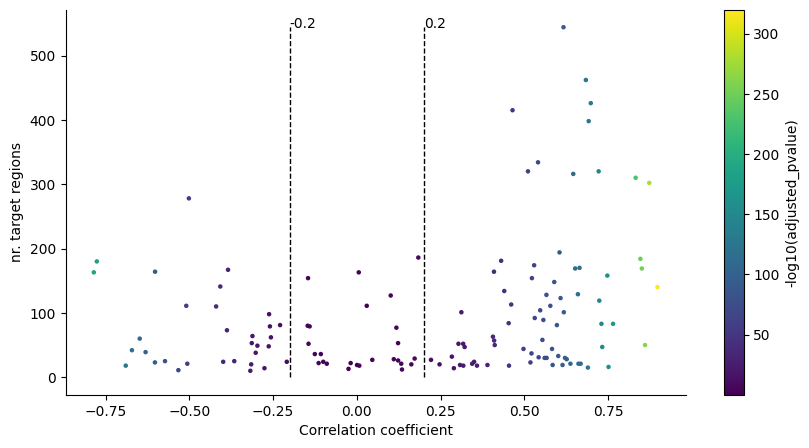

In [24]:
import numpy as np
n_targets = [int(x.split('(')[1].replace('r)', '')) for x in scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Cistrome']]
rho = scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Rho'].to_list()
adj_pval = scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Adjusted_p-value'].to_list()

thresholds = {
        'rho': [-0.2, 0.2],
        'n_targets': 0
}
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (10, 5))
sc = ax.scatter(rho, n_targets, c = -np.log10(adj_pval), s = 5)
ax.set_xlabel('Correlation coefficient')
ax.set_ylabel('nr. target regions')
#ax.hlines(y = thresholds['n_targets'], xmin = min(rho), xmax = max(rho), color = 'black', ls = 'dashed', lw = 1)
ax.vlines(x = thresholds['rho'], ymin = 0, ymax = max(n_targets), color = 'black', ls = 'dashed', lw = 1)
ax.text(x = thresholds['rho'][0], y = max(n_targets), s = str(thresholds['rho'][0]))
ax.text(x = thresholds['rho'][1], y = max(n_targets), s = str(thresholds['rho'][1]))
sns.despine(ax = ax)
fig.colorbar(sc, label = '-log10(adjusted_pvalue)', ax = ax)
plt.show()

In [26]:
selected_cistromes = scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based'].loc[
        np.logical_or(
                scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Rho'] > thresholds['rho'][1],
                scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Rho'] < thresholds['rho'][0]
        )]['Cistrome'].to_list()
selected_eRegulons = [x.split('_(')[0] for x in selected_cistromes]
selected_eRegulons_gene_sig = [
        x for x in scplus_obj.uns['eRegulon_signatures_filtered']['Gene_based'].keys()
        if x.split('_(')[0] in selected_eRegulons]
selected_eRegulons_region_sig = [
        x for x in scplus_obj.uns['eRegulon_signatures_filtered']['Region_based'].keys()
        if x.split('_(')[0] in selected_eRegulons]
#save the results in the scenicplus object
scplus_obj.uns['selected_eRegulon'] = {'Gene_based': selected_eRegulons_gene_sig, 'Region_based': selected_eRegulons_region_sig}
print(f'selected: {len(selected_eRegulons_gene_sig)} eRegulons')

selected: 111 eRegulons


In [27]:
from scenicplus.plotting.dotplot import generate_dotplot_df
plotting_df = generate_dotplot_df(
        scplus_obj = scplus_obj,
        size_matrix = scplus_obj.uns['eRegulon_AUC_filtered']['Region_based'],
        color_matrix = scplus_obj.to_df('EXP'),
        scale_size_matrix = True,
        scale_color_matrix = True,
        group_variable = 'lineage',
        subset_eRegulons = scplus_obj.uns['selected_eRegulon']['Gene_based'])
tmp = plotting_df[['index', 'eRegulon_name', 'color_val']
        ].pivot_table(index = 'index', columns = 'eRegulon_name'
        ).fillna(0)['color_val']
tmp
idx_max = tmp.idxmax(axis = 0)
order = pd.concat([idx_max[idx_max == x] for x in tmp.index.tolist() if len(plotting_df[plotting_df == x]) > 0]).index.tolist()
plotting_df['eRegulon_name'] = pd.Categorical(plotting_df['eRegulon_name'], categories = order)
plotting_df['repressor_activator'] = ['activator' if '+' in n.split('_')[1] and 'extended' not in n or '+' in n.split('_')[2] and 'extended' in n  else 'repressor' for n in plotting_df['eRegulon_name']]
plotting_df.to_csv('./mouse_tfdf_pseudo_20_total.csv')

In [28]:
import dill
dill.dump(scplus_obj, open(os.path.join(saveDir, 'scplus_obj_total.pkl'), 'wb'), protocol=-1)